In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import sidetable

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Asunciones y Preprocesamiento
# ==============================================================================
from scipy import stats
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools

# ANOVA
# ==============================================================================
import statsmodels.api as sm
from statsmodels.formula.api import ols


#Linear Regresion con Sklearn
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Librerías para manejar fechas
from datetime import datetime
import calendar

# Desplegar todas las columnas
pd.options.display.max_columns = None

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df= pd.read_pickle("datos/1.bikes_limpio.pkl")
df.head(2)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,winter,0,1,0,1,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [3]:
df_registered= pd.read_pickle("datos/1.registrados.pkl")
#df_registered = pd.read_csv("datos/1.registrados.csv", index_col=0)
df_registered.head(2)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,temp,atemp,hum,windspeed,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,654,985
2,2018-01-02,winter,0,1,0,1,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,670,801


In [4]:
df_casual= pd.read_pickle("datos/1.casuales.pkl")
# df_casual = pd.read_csv("datos/1.casuales.csv", index_col=0)
df_casual.head(2)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,331,985
2,2018-01-02,winter,0,1,0,1,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,801


`Como se mencionó anteriormente, se ha decidido construir un modelo para predecir el número de bicicletas que alquilan por día los usuarios registrados y otro para los usuarios casuales. En esta sección presentaremos un análisis gráfico de la correlación para todo el dataset y para los dataset de usuarios registrados y casuales. Se incluye en los gráficos a la variable respuesta.`

# Correlación Dataset completo

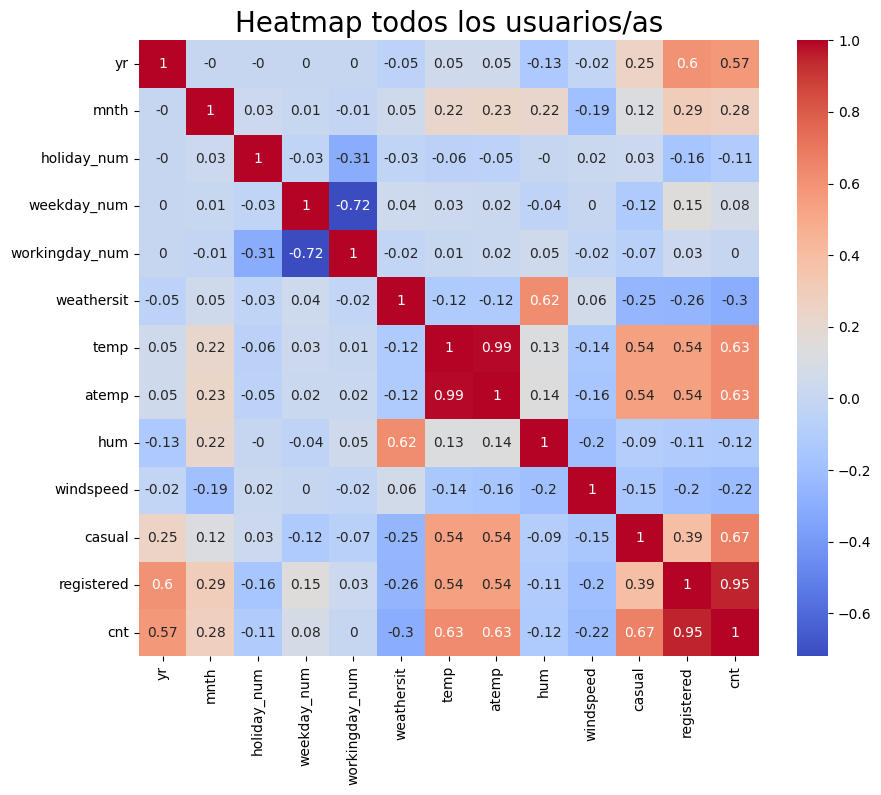

In [5]:
sns.heatmap(round(df.corr(),2), 
           cmap = "coolwarm",
           annot = True);
plt.title("Heatmap todos los usuarios/as", fontsize =20)
plt.show()

## Análisis general

Tras observar las relaciones, observamos columnas redundantes, por lo que decidimos:

**Borrar:**

- *hum*: aporta menos información que weathersit
- *temp*: indicador objetivo, preferimos la temperatura percibida.
- *wind*: borramos. No es necesaria.

**Trabajar con:**
- *weathersit*: cuatro categorías, nos da información sobre el tiempo.
- *atemp*: consideramos que la variable sensación térmica es más adecuada ya que contempla dos datos. En invierno este valor depende de la combinación de temperatura y viento, y en verano es resultado de la combinación de temperatura y humedad relativa.  
 [referencia: meteo navarra](http://meteo.navarra.es/win/sensaciontermica.cfm#:~:text=Aunque%20la%20temperatura%20del%20aire,al%20igual%20que%20la%20temperatura.)

# Correlación Registrados

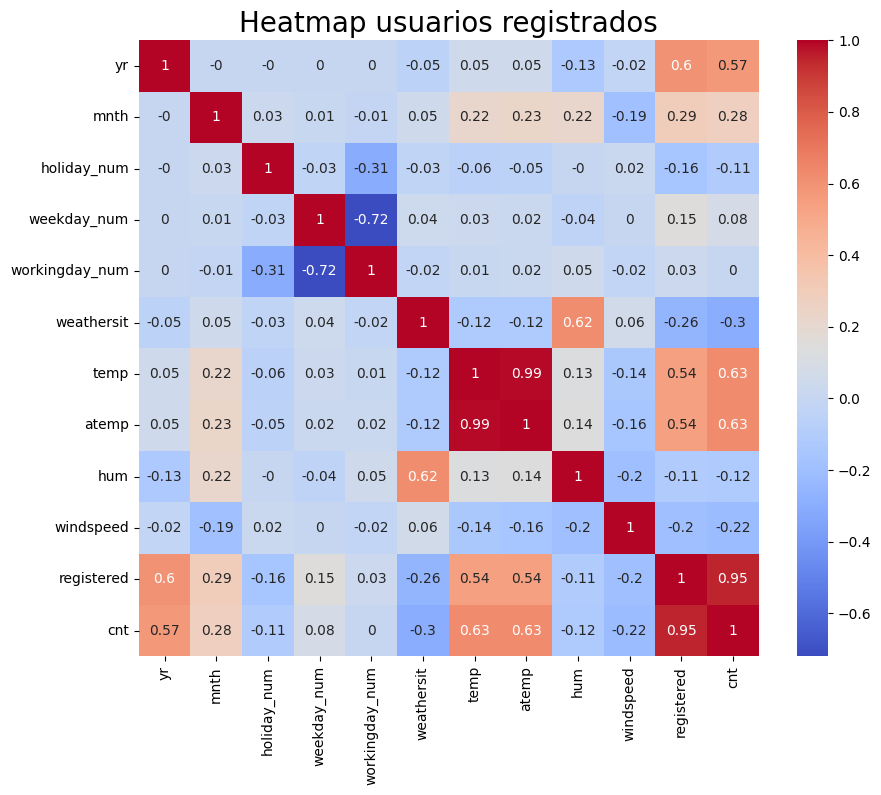

In [6]:
sns.heatmap(round(df_registered.corr(),2), 
           cmap = "coolwarm",
           annot = True);
plt.title("Heatmap usuarios registrados", fontsize =20)
plt.show()

## Análisis registrados

En línea con lo observado en el heatmap de todos los usuarios, decidimos:

**Borrar:**

- *hum*: aporta menos información que weathersit
- *temp*: indicador objetivo, preferimos la temperatura percibida.
- *wind*: borramos. No es necesaria.

**Trabajar con:**
- *weathersit*: cuatro categorías, nos da información sobre el tiempo.
- *atemp*: consideramos que la variable sensación térmica es más adecuada.

# Correlación Casuales

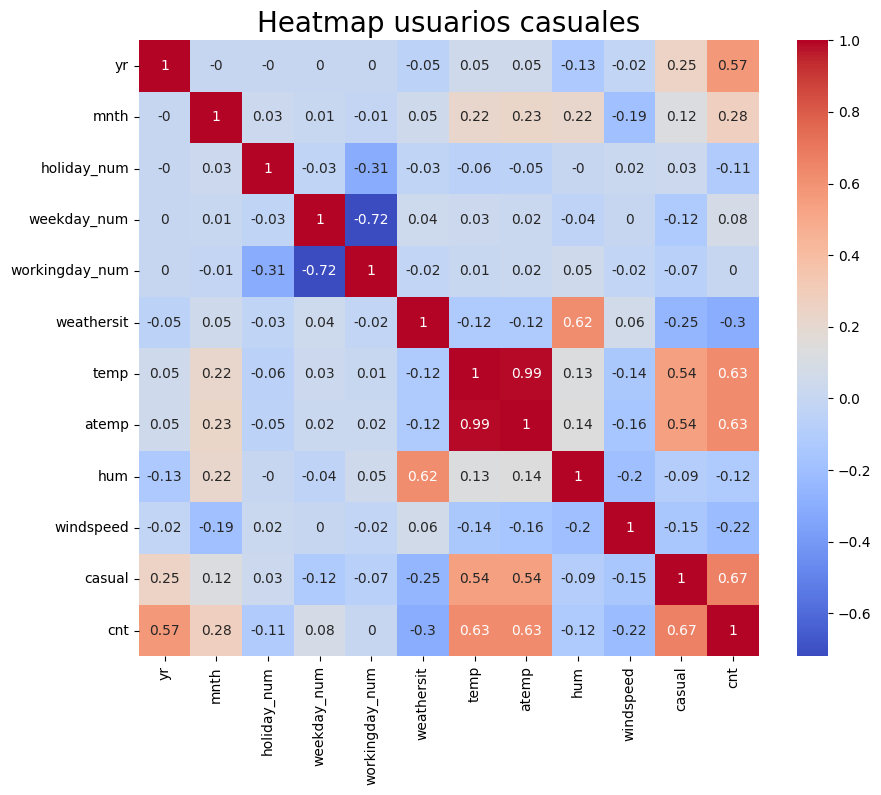

In [7]:
sns.heatmap(round(df_casual.corr(),2), 
           cmap = "coolwarm",
           annot = True);
plt.title("Heatmap usuarios casuales", fontsize =20)
plt.show()

## Análisis casuales

En línea con lo observado en el heatmap de todos los usuarios, decidimos:

**Borrar:**

- *hum*: aporta menos información que weathersit
- *temp*: indicador objetivo, preferimos la temperatura percibida.
- *wind*: borramos. No es necesaria.

**Trabajar con:**
- *weathersit*: cuatro categorías, nos da información sobre el tiempo.
- *atemp*: consideramos que la variable sensación térmica es más adecuada.

# Borrar columnas

Tras el análisis realizado, se procede a borrar las siguientes columnas de los datasets:
- *hum*: aporta menos información que weathersit
- *temp*: indicador objetivo, preferimos la temperatura percibida.
- *wind*: borramos. No es necesaria.
- *weekday_cat*: es una columnas redundante, se creo para comprobar weekday_num

In [8]:
df.drop(['weekday_cat','temp','hum', 'windspeed'], axis=1, inplace=True)
df.head(2)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,workingday_num,weathersit,atemp,casual,registered,cnt
instant,,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,0,2,18.18125,331,654,985
2,2018-01-02,winter,0,1,0,1,1,2,17.68695,131,670,801


In [9]:
df_registered.drop(['weekday_cat','temp','hum', 'windspeed'], axis=1, inplace=True)
df_registered.head(2)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,workingday_num,weathersit,atemp,registered,cnt
instant,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,0,2,18.18125,654,985
2,2018-01-02,winter,0,1,0,1,1,2,17.68695,670,801


In [10]:
df_casual.drop(['weekday_cat','temp','hum', 'windspeed'], axis=1, inplace=True)
df_casual.head(2)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,workingday_num,weathersit,atemp,casual,cnt
instant,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,0,2,18.18125,331,985
2,2018-01-02,winter,0,1,0,1,1,2,17.68695,131,801


# Guardar archivos

### Formato csv

In [11]:
df.to_csv("datos/2.bikes_corr.csv")
df_registered.to_csv("datos/2.registrados_corr.csv")
df_casual.to_csv("datos/2.casuales_corr.csv")

### Formato pikle

In [12]:
df.to_pickle("datos/2.bikes_corr.pkl")
df_registered.to_pickle("datos/2.registrados_corr.pkl")
df_casual.to_pickle("datos/2.casuales_corr.pkl")